# MATSE 580 Homework 1

## Jonathan Boualavong

Thermodynamics of a binary system: $Ti-O$

Data from: A. Watson and T. Markus, Eds., “Ternary System Fe-Mo-Ti: Datasheet from Landolt-Börnstein - Group IV Physical Chemistry ·Volume 19C2: ``Ternary Steel Systems: Phase Diagrams and Phase Transition Data’’ in SpringerMaterials ( https://doi.org/10.1007/978-3-540-88154-4_20 ).” Springer-Verlag Berlin Heidelberg, doi: 10.1007/978-3-540-88154-4_20.

Assignment:<br>
        a). Calculate the heat capacity, entropy, enthalpy and Gibbs energy of each pure element as a function of temperature.<br>
        b). Calculate the phase fractions as a function of temperature for the alloy with 50/50 of each element.<br>
        c). Calculate the enthalpy of formation as a function of composition at 298K.<br>
        d). Calculate the enthalpy of mixing in the liquid phase at a high temperature of your choice.<br>
        e). Calculate the binary phase diagram and label all phase regions of one, two, and three phases in equilibrium.

In [1]:
# Set up the database and primary variables

# Load in the database file
from pycalphad import Database
db = Database("TiO_Complete.tdb")
print(sorted(db.elements))
print(sorted(db.phases))

# Composition: copper, oxygen, vacancies
#comp = sorted(db.elements)
# Relevant phases
#phases = sorted(db.phases)

['/-', 'O', 'TI', 'VA']
['A_TIO', 'BCC_A2', 'FCC_A1', 'GAS', 'HCP_A3', 'I_LIQUID', 'LIQUID', 'TI2O3', 'TI3O2', 'TI3O5', 'TIO2', 'TIOX']


### Part a) Pure element properties
Heat capacity, entropy, enthalpy, and Gibbs energy as a function of temperature.

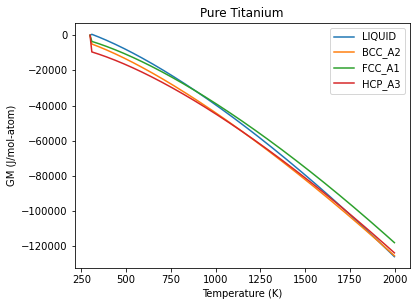

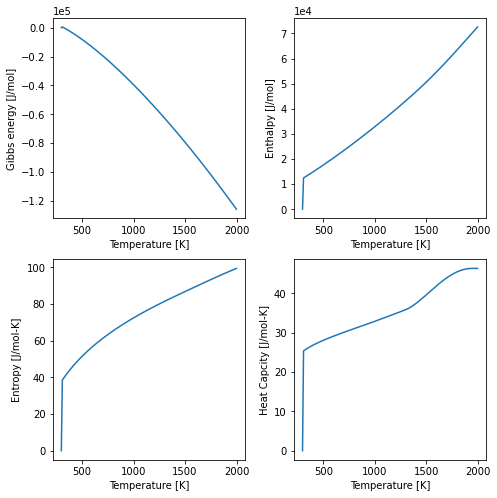

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, calculate, equilibrium, variables as v
#from PT import PT_phase_diagram

# Conditions
P = 101325 # [=] Pa, pressure = 1 atm
T_lo = 298 # [=] K, low temperature bound
T_hi = 2000 # [=] K, high temperature bound
N = 1 # [=] mole

## Properties of pure titanium
# Relevant phases for pure Ti:
phases_Ti = ['LIQUID', 'BCC_A2', 'FCC_A1', 'HCP_A3']

# Gibbs energy of different phases
plt.figure(figsize = [6, 4.5])
for phase in phases_Ti:
    Ti_GM = calculate(db, ['TI', 'VA'], phase, P=P, T=(T_lo, T_hi, 10), N=N)
    plt.plot(Ti_GM.T, Ti_GM.GM.squeeze(), label = phase)
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('GM (J/mol-atom)')
plt.title('Pure Titanium')
plt.show()

# Equilibrium characteristics
conditions = {  # mapping of state variable to values
    v.N: 1,
    v.P: 101325,
    # for now, only temperature has a range. If multiple variables have ranges, all combinations are calculated
    v.T: (T_lo, T_hi, 10),
}
# Start figure
fig, ax = plt.subplots(figsize = [7, 7], sharex=True)

# Gibbs energy
Ti_gm = equilibrium(db, ['Ti'], phases_Ti, conditions, output='GM')
plt.subplot(2,2,1)
plt.plot(Ti_gm.T, Ti_gm.GM.squeeze())
plt.xlabel("Temperature [K]")
plt.ylabel("Gibbs energy [J/mol]")
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = [-3, 3])

# Heat capacity
Ti_cp = equilibrium(db, ['Ti'], phases_Ti, conditions, output='CPM')
plt.subplot(2,2,4)
plt.plot(Ti_cp.T, Ti_cp.CPM.squeeze())
plt.xlabel("Temperature [K]")
plt.ylabel("Heat Capcity [J/mol-K]")
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = [-3, 3])

# Entropy
Ti_sm = equilibrium(db, ['Ti'], phases_Ti, conditions, output='SM')
plt.subplot(2,2,3)
plt.plot(Ti_sm.T, Ti_sm.SM.squeeze())
plt.xlabel("Temperature [K]")
plt.ylabel("Entropy [J/mol-K]")
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = [-3, 3])

# Enthalpy
Ti_hm = equilibrium(db, ['Ti'], phases_Ti, conditions, output='HM')
plt.subplot(2,2,2)
plt.plot(Ti_hm.T, Ti_hm.HM.squeeze())
plt.xlabel("Temperature [K]")
plt.ylabel("Enthalpy [J/mol]")
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = [-3, 3])

# Space the figure out more for ease of viewing
fig.tight_layout(pad=1.0)
plt.show()


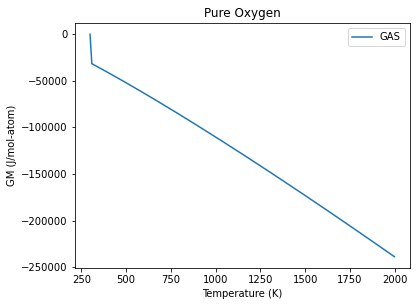

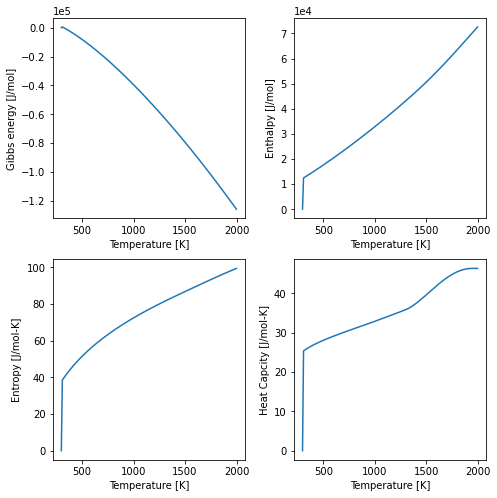

In [3]:
# Repeat for oxygen
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, calculate, equilibrium, variables as v
#from PT import PT_phase_diagram

# Conditions
P = 101325 # [=] Pa, pressure = 1 atm
T_lo = 298 # [=] K, low temperature bound
T_hi = 2000 # [=] K, high temperature bound
N = 1 # [=] mole

## Properties of pure oxygen
# Relevant phases for pure O:
phases_O = ['GAS']

# Gibbs energy of different phases
plt.figure(figsize = [6, 4.5])
for phase in phases_O:
    O_GM = calculate(db, ['O', 'VA'], phase, P=P, T=(T_lo, T_hi, 10), N=N)
    plt.plot(O_GM.T, O_GM.GM.squeeze(), label = phase)
plt.legend()
plt.xlabel('Temperature (K)')
plt.ylabel('GM (J/mol-atom)')
plt.title('Pure Oxygen')
plt.show()

# Equilibrium characteristics
conditions = {  # mapping of state variable to values
    v.N: 1,
    v.P: 101325,
    # for now, only temperature has a range. If multiple variables have ranges, all combinations are calculated
    v.T: (T_lo, T_hi, 10),
}
# Start figure
fig, ax = plt.subplots(figsize = [7, 7], sharex=True)

# Gibbs energy
O_gm = equilibrium(db, ['O'], phases_O, conditions, output='GM')
plt.subplot(2,2,1)
plt.plot(Ti_gm.T, Ti_gm.GM.squeeze())
plt.xlabel("Temperature [K]")
plt.ylabel("Gibbs energy [J/mol]")
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = [-3, 3])

# Heat capacity
O_cp = equilibrium(db, ['O'], phases_O, conditions, output='CPM')
plt.subplot(2,2,4)
plt.plot(Ti_cp.T, Ti_cp.CPM.squeeze())
plt.xlabel("Temperature [K]")
plt.ylabel("Heat Capcity [J/mol-K]")
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = [-3, 3])

# Entropy
O_sm = equilibrium(db, ['O'], phases_O, conditions, output='SM')
plt.subplot(2,2,3)
plt.plot(Ti_sm.T, Ti_sm.SM.squeeze())
plt.xlabel("Temperature [K]")
plt.ylabel("Entropy [J/mol-K]")
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = [-3, 3])

# Enthalpy
O_hm = equilibrium(db, ['O'], phases_O, conditions, output='HM')
plt.subplot(2,2,2)
plt.plot(Ti_hm.T, Ti_hm.HM.squeeze())
plt.xlabel("Temperature [K]")
plt.ylabel("Enthalpy [J/mol]")
plt.ticklabel_format(axis = 'y', style = 'sci', scilimits = [-3, 3])

# Space the figure out more for ease of viewing
fig.tight_layout(pad=1.0)
plt.show()

### Part b) Equimolar mixture phase fractions
as a function of temperature

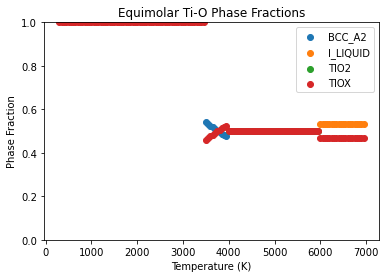

In [54]:
import matplotlib.pyplot as plt
import numpy as np
from pycalphad import Database, calculate, equilibrium, variables as v
#from PT import PT_phase_diagram

# Equilibrium characteristics
conditions = {  # mapping of state variable to values
    v.N: 1,
    v.P: 101325,
    v.T: (300, 7000, 50), # Wide temperature range because the melting temperatures are so high; coarse resolution to save on computation time
    v.X('O'): 0.5
}
phases_mix = ['A_TIO', 'BCC_A2', 'FCC_A1', 'GAS', 'HCP_A3', 'I_LIQUID', 'LIQUID', 'TI2O3', 'TI3O2', 'TI3O5', 'TIO2', 'TIOX']
phase_eq = equilibrium(db, ['TI', 'O', 'VA'], phases_mix, conditions)
for phase in phases_mix:
    # Phase indices for plotting
    phase_indices = np.nonzero(phase_eq.Phase.values == phase)
    # Many phases are not present in any appreciable amount; omit if empty so the legend is not too large
    if len(phase_eq.NP.values[phase_indices]) > 0:
        plt.scatter(np.take(phase_eq['T'].values, phase_indices[2]), phase_eq.NP.values[phase_indices], label = phase)
plt.legend(loc = 'lower left')
plt.title('Equimolar Ti-O System')
plt.ylabel('Phase Fraction')
plt.ylim(0, 1)
plt.xlabel('Temperature (K)')
plt.show()



### Part c) Enthalpy of formation
T = 298 K as a function of composition

### Part d) Enthalpy of mixing, liquid phase

### Part e) Binary phase diagram
Label all phase regions of 1, 2, and 3, phase equilibrium